In [1]:
#Data cleaning
import pandas as pd
import numpy as np
dfCSV = pd.read_csv("C:/Users/meera/Desktop/census.csv")
dfCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [2]:
#check age
print(dfCSV["age"].value_counts())
print(dfCSV["age"].max())
print(dfCSV["age"].min())

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
90
17


In [3]:
#check workclass and change as category and replace to other-workclass
print(dfCSV["workclass"].value_counts())
dfCSV["workclass"] = dfCSV["workclass"].str.replace("?", "Other_workclass")
print(dfCSV["workclass"].value_counts())
dfCSV["workclass"] = dfCSV["workclass"].astype("category")
print(dfCSV["workclass"].dtype)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Other_workclass      2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
category


In [4]:
#check fnlwgt
print(dfCSV["fnlwgt"].value_counts())
print(dfCSV["fnlwgt"].max())
print(dfCSV["fnlwgt"].min())

203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64
1490400
12285


In [5]:
#change education as category
print(dfCSV["education"].dtype)
dfCSV["education"] = dfCSV["education"].astype("category")
print(dfCSV["education"].dtype)

object
category


In [6]:
#check education-num
print(dfCSV["education-num"].value_counts())

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64


In [7]:
#change marital-status as category
print(dfCSV["marital-status"].dtype)
dfCSV["marital-status"] = dfCSV["marital-status"].astype("category")
print(dfCSV["marital-status"].dtype)

object
category


In [8]:
#check occupation and change as category and replace to nan
print(dfCSV["occupation"].value_counts())
dfCSV.loc[dfCSV["occupation"] == "?", "occupation"] = np.nan
dfCSV["occupation"] = dfCSV["occupation"].astype("category")
print(dfCSV["occupation"].dtype)

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
category


In [9]:
dfCSV["native-country"] = dfCSV["native-country"].str.replace("?", "Other_country")
print(dfCSV["native-country"].value_counts())

United-States                 43832
Mexico                          951
Other_country                   857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [10]:
#check duplicate
print(dfCSV.info())
duplicates = dfCSV.duplicated()
print(dfCSV[duplicates].shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  object  
 8   race            48842 non-null  object  
 9   sex             48842 non-null  object  
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  object  
 14  income          48842 non-null  object  
dtypes: category(4), int64(6), object(5)
memory usage: 4.3+ MB
None
(52, 15)


In [11]:
#drop duplicate
dfCSV.drop_duplicates(inplace=True)
print(dfCSV.shape)

(48790, 15)


In [12]:
#1)	Does working more hours lead to higher income?

# Number of records where individual works not overtime and income is more than $50,000
n_l35_m50k = dfCSV[(dfCSV['hours-per-week'] <= 35) & (dfCSV['income'] == '>50K')].shape[0]
print("Individuals works not overtime and income is more than $50,000: {}".format(n_l35_m50k))

# Number of records where individual works not overtime and income is at most $50,000
n_l35_a50k = dfCSV[(dfCSV['hours-per-week'] <= 35) & (dfCSV['income'] == '<=50K')].shape[0]
print("Individuals works not overtime and income is at most $50,000: {}".format(n_l35_a50k))

# Number of records where individual works overtime and income is more than $50,000
n_m35_m50k = dfCSV[(dfCSV['hours-per-week'] > 35) & (dfCSV['income'] == '>50K')].shape[0]
print("Individuals works overtime and income is more than $50,000: {}".format(n_m35_m50k))

# Number of records where individual works overtime and income is at most $50,000
n_m35_a50k = dfCSV[(dfCSV['hours-per-week'] > 35) & (dfCSV['income'] == '<=50K')].shape[0]
print("Individuals works overtime and income is at most $50,000: {}".format(n_m35_a50k))

Individuals works not overtime and income is more than $50,000: 864
Individuals works not overtime and income is at most $50,000: 9456
Individuals works overtime and income is more than $50,000: 10817
Individuals works overtime and income is at most $50,000: 27653


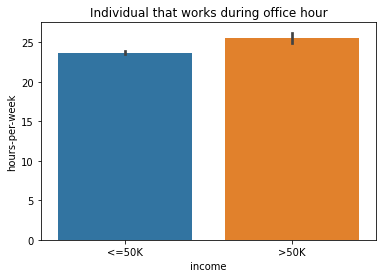

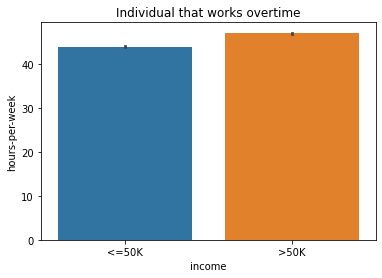

<Figure size 432x288 with 0 Axes>

In [13]:
#graph
# Number of records where individual works not overtime
n_less_35 = dfCSV[dfCSV['hours-per-week'] <= 35]

# Number of records where individual works overtime
n_more_35 = dfCSV[dfCSV['hours-per-week'] > 35]

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=n_less_35['income'], y=n_less_35['hours-per-week'], data=n_less_35)
plt.title('Individual that works during office hour')
plt.show()
plt.clf()

sns.barplot(x=n_more_35['income'], y=n_more_35['hours-per-week'], data=n_more_35)
plt.title('Individual that works overtime')
plt.show()
plt.clf()

In [14]:
#2)	Many people believe that the “A” students will end up working for “C” students. Do you think the statement is correct (based on this dataset)?
high_oc = ['Exec-managerial', 'Prof-specialty']
low_oc = ['Craft-repair', 'Handlers-cleaners', 'Armed-Forces', 'Transport-moving', 'Other-service',
                       'Farming-fishing', 'Sales', 'Tech-support', 'Priv-house-serv', 'Protective-serv', 'Adm-clerical', 
                       'Machine-op-inspct']
n_astudhigh = dfCSV[(dfCSV['education-num'] >= 13) & (dfCSV['education-num'] <=16) & (dfCSV["occupation"].isin(high_oc))].shape[0]
print("A student with high oc: {}".format(n_astudhigh))
n_astudlow = dfCSV[(dfCSV['education-num'] >=1) & (dfCSV['education-num'] <=8) & (dfCSV["occupation"].isin(low_oc))].shape[0]
print("C student with low oc: {}".format(n_astudlow))
n_cstudhigh = dfCSV[(dfCSV['education-num'] >= 13) & (dfCSV['education-num'] <=16) & (dfCSV["occupation"].isin(low_oc))].shape[0]
print("A student with low oc: {}".format(n_cstudhigh))
n_cstudlow = dfCSV[(dfCSV['education-num'] >=1) & (dfCSV['education-num'] <=8) & (dfCSV["occupation"].isin(high_oc))].shape[0]
print("C student with high oc: {}".format(n_cstudlow))

A student with high oc: 7602
C student with low oc: 5501
A student with low oc: 4134
C student with high oc: 260


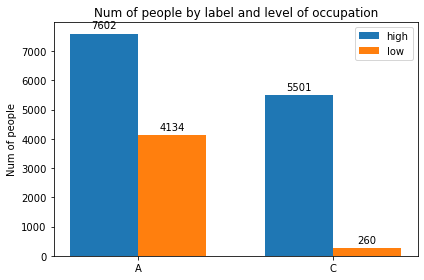

In [15]:
#Graph:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['A' ,'C']

A = [n_astudhigh, n_astudlow]
C = [n_cstudhigh, n_cstudlow]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, A, width, label='high')
rects2 = ax.bar(x + width/2, C, width, label='low')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Num of people')
ax.set_title('Num of people by label and level of occupation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [16]:
#3)	People with high-income level has a lot of investments?
# Number of records where individual's income is more than $50,000
n_greater_50k = dfCSV[dfCSV['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = dfCSV[dfCSV['income'] == '<=50K'].shape[0]

# Number of records where individual's capital gain
n_gain = dfCSV[dfCSV['capital-gain'] != 0].shape[0]

# Number of records where individual's capital loss
n_loss = dfCSV[dfCSV['capital-loss'] != 0].shape[0]

print("Number of records where individual's income is more than $50,000: {}".format(n_greater_50k))
print("Number of records where individual's income is at most $50,000: {}".format(n_at_most_50k))
print("Number of records where individual's capital gain: {}".format(n_gain))
print("Number of records where individual's capital loss: {}".format(n_loss))

Number of records where individual's income is more than $50,000: 11681
Number of records where individual's income is at most $50,000: 37109
Number of records where individual's capital gain: 4035
Number of records where individual's capital loss: 2282


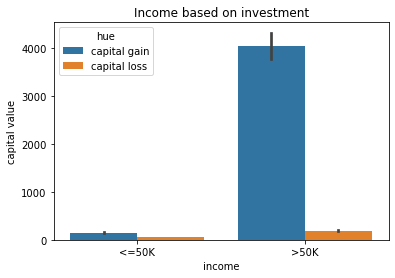

In [17]:
#Graph:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.DataFrame({'x':dfCSV['income'],'y':dfCSV['capital-gain']})
df2=pd.DataFrame({'x':dfCSV['income'],'y':dfCSV['capital-loss']})
df1['hue']='capital gain'
df2['hue']='capital loss'
res=pd.concat([df1,df2])
sns.barplot(x='x',y='y',data=res,hue='hue')
plt.xlabel("income")
plt.ylabel("capital value")
plt.title('Income based on investment')
plt.show()

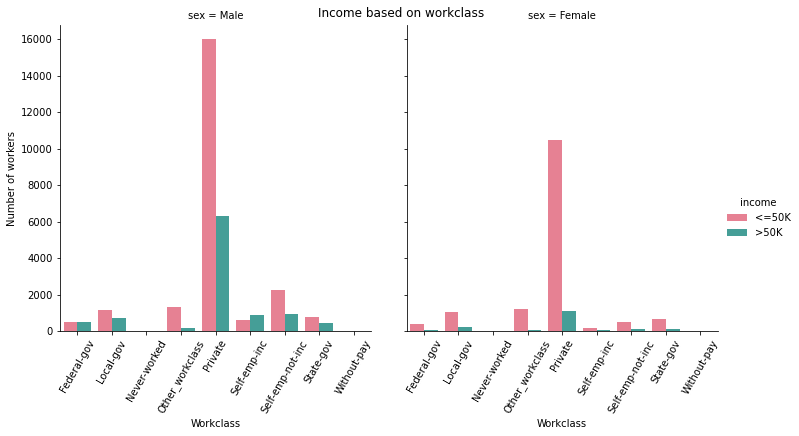

In [18]:
#Hypothesis
import matplotlib.pyplot as plt
import seaborn as sns

g= sns.catplot(x="workclass", col="sex", hue="income", data=dfCSV, kind="count", palette="husl")
g.fig.suptitle("Income based on workclass")
g.set_xticklabels(rotation=60)
g.set_xlabels("Workclass")
g.set_ylabels("Number of workers")

plt.show()

In [19]:
#machine learning
import pandas as pd
import numpy as np
dfCSV = pd.read_csv("C:/Users/meera/Desktop/census.csv")
dfCSV.head()
dfCSV.info()

unknown_values = (dfCSV[['age','workclass',
                        'fnlwgt','education','education-num',
                        'marital-status','occupation','relationship',
                        'race','sex','capital-gain','capital-loss',
                        'hours-per-week', 'native-country', 
                        'income']]== '?').sum()
print(unknown_values)

dfCSV['workclass'] = dfCSV['workclass'].replace(['?'],'Other_workclass')
dfCSV['occupation'] = dfCSV['occupation'].replace(['?'],'Other_Occupation')
dfCSV['native-country'] = dfCSV['native-country'].replace(['?'],'Other_native_country')

unknown_values = (dfCSV[['age','workclass',
                        'fnlwgt','education','education-num',
                        'marital-status','occupation','relationship',
                        'race','sex','capital-gain','capital-loss',
                        'hours-per-week', 'native-country',
                        'income']]== '?').sum()
print(unknown_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
age                  0
workclass         2799
fnlwgt               0
education            0
e

In [20]:
# Data transformation to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['age','workclass','fnlwgt','education','education-num',
           'marital-status','occupation','relationship','race','sex',
           'capital-gain','capital-loss','hours-per-week', 'native-country',
           'income']
le = LabelEncoder()
for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])

In [21]:
#Data and target
x = dfCSV.iloc [:, :14]
y = dfCSV.loc[:, ['income']]

In [22]:
#Dataframe to numpy array
x = x.values
y = y.values
y = y.ravel()

In [23]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [39]:
# Number of records where individual's income is more than $50,000
n_greater_50k = dfcsv[dfcsv['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = dfcsv[dfcsv['income'] == '<=50K'].shape[0]

# Number of records where individual's capital gain
n_gain = dfcsv[dfcsv['capital-gain'] != 0].shape[0]

# Number of records where individual's capital loss
n_loss = dfcsv[dfcsv['capital-loss'] != 0].shape[0]

print(n_greater_50k)
print(n_at_most_50k)
print(n_gain)
print(n_loss)

11687
37155
4035
2282


In [25]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[7059  372]
 [1664  674]]


In [26]:
# Specific to the figures
TP_1 = int(cm1[0,0]) #upper-left of confusion matrix
FP_1 = int(cm1[1,0]) #below-left of confusion matrix
FN_1 = int(cm1[0,1]) #upper-right of confusion matrix
TN_1 = int(cm1[1,1]) #below-right of confusion matrix

# Calculate accuracy, precision and recall
accuracy_1 = (TP_1+ TN_1)/ (TP_1 + FP_1 + TN_1 + FN_1)
precision_1 = TP_1 / (TP_1 + FP_1)
recall_1 = TP_1 / (TP_1 + FN_1)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
fscore_1 = (1 + 0.5**2) * ((precision_1 * recall_1) / ((0.5**2) * precision_1 + recall_1))

# Print the result 
print("KNN: [Accuracy : {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy_1,precision_1, recall_1,fscore_1))

KNN: [Accuracy : 0.7916, Precision: 0.8092, Recall: 0.9499, F-score: 0.8339]


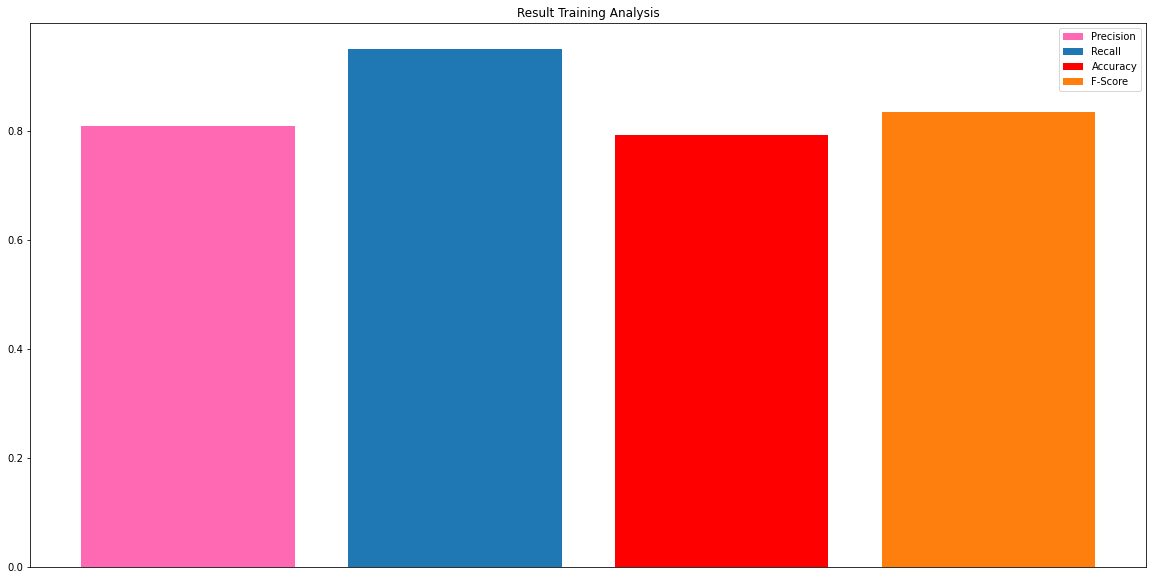

In [27]:
#illustrate the result
import matplotlib.pyplot as plt
ind = np.arange(1)
plt.figure(figsize=(20,10))
plt.bar(ind, precision_1, 0.20, label="Precision", color='hotpink')
plt.bar(ind + 0.25, recall_1, 0.20, label="Recall")
plt.bar(ind + 0.50, accuracy_1, 0.20, label="Accuracy", color='red')
plt.bar(ind + 0.75, fscore_1, 0.20, label="F-Score")
plt.xticks([])
plt.legend()
plt.title('Result Training Analysis')

plt.show()